CH24M571| ML Assignment 2

Perceptron algorithm from scratch

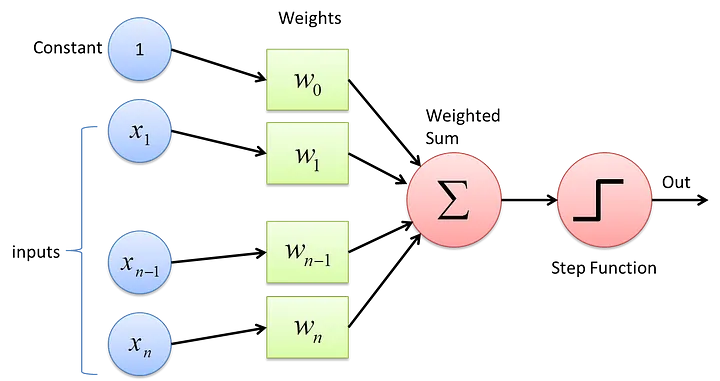

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
class Perceptron(object):

    def __init__(self , eta = 0.01 , n_iter = 10):
        self.eta = eta   #learning rate
        self.n_iter = n_iter    # number of iterations 
        self.weights = None
        self.bias = None 

    # given learning rates is w(t+1) = w(t) + yixi, b(t+1) = b(t) + y

    # def weighted_sum(self , X):
    #     return np.dot(X , self.w_[1:]) + self.w_[0]


    # def fit_func(self,X):
    #     return np.where(self.weighted_sum(X) >= 0.0, 1,-1) # condition , true_val , false_val

    def fit_model(self,X,y)->None:
        n_samples , n_features = X.shape #(rows*columns)
        self.weights = np.zeros(n_features) # initializing weights vector
        self.bias = 0 # scalar so initialized to zero


        for epoch in range(self.n_iter):
            misclassified_count = 0

            for i in range(n_samples):
                prediction = np.dot(X[i],self.weights)+ self.bias

                if (prediction * y[i]) <= 0 :
                    self.weights = self.weights + self.eta * y[i]*X[i]

                    self.bias = self.eta *y[i]

                    misclassified_count +=1

            print(f"Epoch {epoch+1}:")
            print(f"Weights: {self.weights}")
            print(f"Bias: {self.bias}")
            print(f"Number of mistakes: {misclassified_count}")
            print()

            if misclassified_count == 0:
                break
            # no updates if there are no misclassification 

    def predict_model(self , X):
        # return the sign of the output
        return np.sign(np.dot(X ,self.weights)+ self.bias)

In [30]:
X = np.array([[0,0],[1,1],[1,0],[0,1],[0.5,0.5],[2,2],[2,0],[0,2]])
y = np.array([-1,-1,1,1,-1,-1,1,1])

perceptron = Perceptron(eta= 0.1 , n_iter = 15)
perceptron.fit_model(X,y)

print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)

predictions = perceptron.predict_model(X)
print("Predictions:", predictions)

Epoch 1:
Weights: [0.25 0.15]
Bias: 0.1
Number of mistakes: 5

Epoch 2:
Weights: [0.1 0.1]
Bias: 0.1
Number of mistakes: 7

Epoch 3:
Weights: [ 0.25 -0.05]
Bias: 0.1
Number of mistakes: 5

Epoch 4:
Weights: [0.1 0.1]
Bias: 0.1
Number of mistakes: 5

Epoch 5:
Weights: [ 0.25 -0.05]
Bias: 0.1
Number of mistakes: 5

Epoch 6:
Weights: [0.1 0.1]
Bias: 0.1
Number of mistakes: 5

Epoch 7:
Weights: [ 0.25 -0.05]
Bias: 0.1
Number of mistakes: 5

Epoch 8:
Weights: [0.1 0.1]
Bias: 0.1
Number of mistakes: 5

Epoch 9:
Weights: [ 0.25 -0.05]
Bias: 0.1
Number of mistakes: 5

Epoch 10:
Weights: [0.1 0.1]
Bias: 0.1
Number of mistakes: 5

Epoch 11:
Weights: [ 0.25 -0.05]
Bias: 0.1
Number of mistakes: 5

Epoch 12:
Weights: [0.1 0.1]
Bias: 0.1
Number of mistakes: 5

Epoch 13:
Weights: [ 0.25 -0.05]
Bias: 0.1
Number of mistakes: 5

Epoch 14:
Weights: [0.1 0.1]
Bias: 0.1
Number of mistakes: 5

Epoch 15:
Weights: [ 0.25 -0.05]
Bias: 0.1
Number of mistakes: 5

Weights: [ 0.25 -0.05]
Bias: 0.1
Predictions: [1.

In [35]:
# transforming dataset with non-linear mapping 

X_transformed = np.column_stack((X , X[:,0]**2 + X[:,1]**2))

print(X_transformed)
# now has 3 features as compared to 2 in the previous 

perceptron = Perceptron(eta=0.1, n_iter=15)
perceptron.fit_model(X_transformed, y)

predictions = perceptron.predict_model(X_transformed)
print("Predictions:", predictions)

[[0.  0.  0. ]
 [1.  1.  2. ]
 [1.  0.  1. ]
 [0.  1.  1. ]
 [0.5 0.5 0.5]
 [2.  2.  8. ]
 [2.  0.  4. ]
 [0.  2.  4. ]]
Epoch 1:
Weights: [ 0.05 -0.05  0.05]
Bias: 0.1
Number of mistakes: 6

Epoch 2:
Weights: [ 0.2 -0.1  0.4]
Bias: 0.1
Number of mistakes: 6

Epoch 3:
Weights: [ 0.05 -0.15  0.25]
Bias: 0.1
Number of mistakes: 7

Epoch 4:
Weights: [ 0.  -0.2  0.2]
Bias: 0.1
Number of mistakes: 8

Epoch 5:
Weights: [-0.05 -0.25  0.15]
Bias: 0.1
Number of mistakes: 8

Epoch 6:
Weights: [ 0.  -0.3  0.2]
Bias: 0.1
Number of mistakes: 6

Epoch 7:
Weights: [-0.05 -0.25  0.25]
Bias: 0.1
Number of mistakes: 6

Epoch 8:
Weights: [-0.1 -0.3  0.2]
Bias: 0.1
Number of mistakes: 8

Epoch 9:
Weights: [-0.05 -0.35  0.25]
Bias: 0.1
Number of mistakes: 6

Epoch 10:
Weights: [-0.1 -0.3  0.3]
Bias: 0.1
Number of mistakes: 6

Epoch 11:
Weights: [-0.15 -0.35  0.25]
Bias: 0.1
Number of mistakes: 8

Epoch 12:
Weights: [-0.2 -0.3  0.3]
Bias: 0.1
Number of mistakes: 6

Epoch 13:
Weights: [-0.25 -0.35  0.25]
Bia

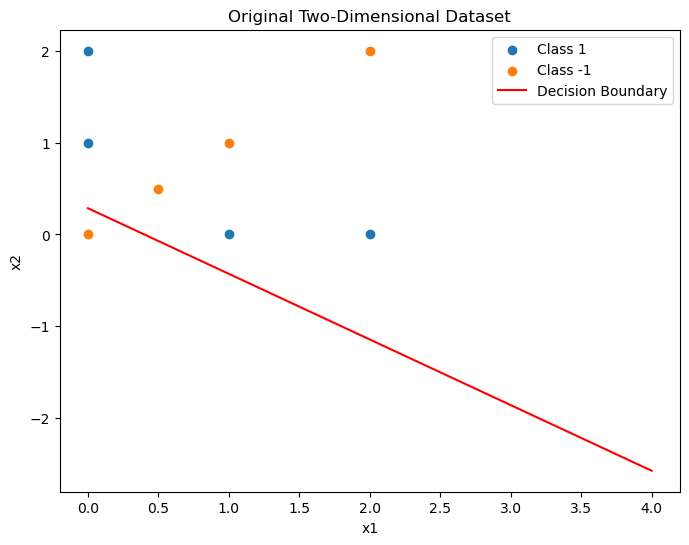

In [38]:
# Plot the original two-dimensional dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class -1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original Two-Dimensional Dataset')
plt.legend()

# Plot the decision boundary in the original two-dimensional space
x1 = np.linspace(0, 4, 100)
x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]
plt.plot(x1, x2, color='r', label='Decision Boundary')
plt.legend()
plt.show()

Question 2 | SVM

Find the hinge loss for this soft-margin SVM classifier on the dataset that is given in
the table. The weight vector and bias are as follows:
w = [1, −1]T
, b = 1
The coefficient C can be assumed to be 1.
x1 x2 y
1 4 -1
-1 2 -1
0 0 -1
1 2 -1
1 3 1
1 0 1
2 1 1
2 3 1
Note that you just need to report the hinge loss. Do not compute margin loss, which
involves only the term w. Also, note that the hinge loss does not have a factor of 0.5
before it. Enter the closest integer as your answer.

In [2]:
import numpy as np 

weight = np.array([1,-1])
bias = 1

X = np.array([
    [1, 4],
    [-1, 2],
    [0, 0],
    [1, 2],
    [1, 3],
    [1, 0],
    [2, 1],
    [2, 3]
])

y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

In [4]:
def hinge_loss(X,y,w,b):
    losses = np.maximum(0,1-y*(np.dot(X,weight)+bias))
    total_loss = np.sum(losses)
    return total_loss

loss = hinge_loss(X,y,weight,bias)
print("Total Hinge Loss",loss)


Total Hinge Loss 6


Question 3 | GMM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

In [ ]:
X, y_true = make_blobs(n_samples=2000, centers=3, cluster_std=1.0, random_state=42)


In [ ]:
# train-test split

indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * len(indices))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]